# AVL demo notebook 2: working with raster data

This notebook demonstrates the process of opening a raster dataset from a Zarr source in a pre-defined data store, manipulating it, plotting it in the notebook, and writing the modified version to another data store.

First, we import some necessary libraries and set a reasonable size for inline plots in the notebook.

In [1]:
import os
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = 18,8

List the available datasets in the staging store.

In [2]:
list(staging_store.get_data_ids())

['avl/l2a-s1-resampled/2019/bel/S1_L2_BCK_VH_31UFR.zarr',
 'avl/l2a-s1-resampled/2019/bel/S1_L2_BCK_VH_31UFS.zarr',
 'avl/l2a-s1-resampled/2019/bel/S1_L2_BCK_VV_31UFR.zarr',
 'avl/l2a-s1-resampled/2019/bel/S1_L2_BCK_VV_31UFS.zarr',
 'avl/l2a-s1-resampled/2019/bel/S1_L2_COH_VH_31UFR.zarr',
 'avl/l2a-s1-resampled/2019/bel/S1_L2_COH_VH_31UFS.zarr',
 'avl/l2a-s1-resampled/2019/bel/S1_L2_COH_VV_31UFR.zarr',
 'avl/l2a-s1-resampled/2019/bel/S1_L2_COH_VV_31UFS.zarr',
 'avl/l2a-s1-resampled/2019/fra/S1_L2_BCK_VH_30TWT.zarr',
 'avl/l2a-s1-resampled/2019/fra/S1_L2_BCK_VH_30TXT.zarr',
 'avl/l2a-s1-resampled/2019/fra/S1_L2_BCK_VV_30TWT.zarr',
 'avl/l2a-s1-resampled/2019/fra/S1_L2_BCK_VV_30TXT.zarr',
 'avl/l2a-s1-resampled/2019/fra/S1_L2_COH_VH_30TWT.zarr',
 'avl/l2a-s1-resampled/2019/fra/S1_L2_COH_VH_30TXT.zarr',
 'avl/l2a-s1-resampled/2019/fra/S1_L2_COH_VV_30TWT.zarr',
 'avl/l2a-s1-resampled/2019/fra/S1_L2_COH_VV_30TXT.zarr',
 'avl/l2a-s1-resampled/2020/bel/S1_L2_BCK_VH_31UFR.zarr',
 'avl/l2a-s1-r

Open a cube of Sentinel 2 data from the store.

In [3]:
cube = staging_store.open_data('s2/france/30twt_30txt.zarr')

Show a summary of the data cube’s structure and contents.

In [4]:
cube

<xarray.Dataset>
Dimensions:    (time: 37, lat: 8192, lon: 22528, bnds: 2)
Coordinates:
  * lat        (lat) float64 47.92 47.92 47.92 47.92 ... 46.86 46.86 46.86 46.86
  * lon        (lon) float64 -3.0 -3.0 -3.0 -3.0 ... -0.07169 -0.07156 -0.07143
  * time       (time) datetime64[ns] 2019-01-06 2019-01-16 ... 2020-01-01
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(6, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    B02        (time, lat, lon) float32 dask.array<chunksize=(2, 1024, 1024), meta=np.ndarray>
    B03        (time, lat, lon) float32 dask.array<chunksize=(2, 1024, 1024), meta=np.ndarray>
    B04        (time, lat, lon) float32 dask.array<chunksize=(2, 1024, 1024), meta=np.ndarray>
    B05        (time, lat, lon) float32 dask.array<chunksize=(2, 1024, 1024), meta=np.ndarray>
    B06        (time, lat, lon) float32 dask.array<chunksize=(2, 1024, 1024), meta=np.ndarray>
    B07        (time, lat, lon) float32 dask.array<chunksize=(2, 1024, 1024), meta=np.ndarray>
    B08        (time, lat, lon) float32 dask.array<chunksize=(2, 1024, 1024), meta=np.ndarray>
    B11        (time, lat, lon) float32 dask.array<chunksize=(2, 1024, 1024), meta=np.ndarray>
    SCL        (time, lat, lon) uint8 dask.array<chunksize=(2, 1024, 1024), meta=np.ndarray>
Attributes: (12/13)
    Conventions:               CF-1.7
    date_created:              2021-12-15T12:38:12.371819
    geospatial_lat_max:        47.92496
    geospatial_lat_min:        46.86
    geospatial_lon_max:        -0.07136000000000031
    geospatial_lon_min:        -3.0
    ...                        ...
    processing_level:          L2A
    time_coverage_duration:    P10DT0H0M0S
    time_coverage_end:         2020-01-06T00:00:00+00:00
    time_coverage_resolution:  P10DT0H0M0S
    time_coverage_start:       2019-12-27T00:00:00+00:00
    title:                     S2L2A Data Cube Subset

For a selected point in time, plot band 4 (red reflectance) in the notebook.

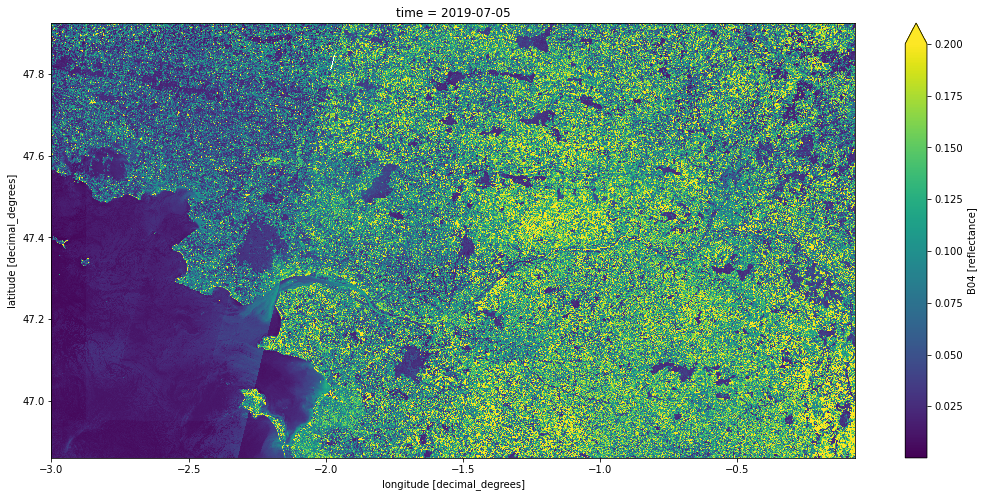

In [5]:
cube.sel(time='2019-07-01', method='nearest').B04.plot.imshow(vmax=0.2)

With the dataset opened in the notebook, we can now use the full range of [xcube](https://xcube.readthedocs.io/) and [xarray](https://docs.xarray.dev/) features to manipulate and analyse the cube – for example, to focus on particular bands and a particular area of interest:

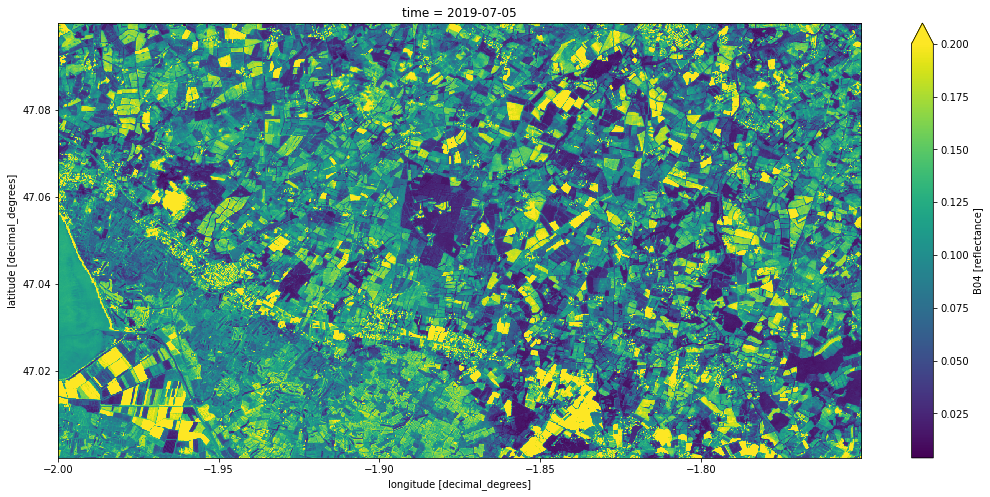

In [6]:
sub_cube = cube[['B02', 'B03', 'B04']].sel(
    lat=slice(47.1, 47.0),
    lon=slice(-2.0, -1.75),
    time=slice('2019-01-01', '2019-09-01')).chunk('auto')
sub_cube.sel(time='2019-07-01', method='nearest').B04.plot.imshow(vmax=0.2)

Save the newly created sub-cube to the public data store; from here it can be read externally and shown in the viewer.

In [7]:
my_zarr_id = 'demo-notebook-2-raster-data.zarr'
public_store_write.write_data(data=sub_cube, data_id=my_zarr_id, replace=True)

'demo-notebook-2-raster-data.zarr'

Open the saved cube again from the public read-only store to check that it was written as expected.

In [8]:
my_username = os.environ['JUPYTERHUB_USER']
sub_cube_from_store = public_store_read.open_data(my_username + '/' + my_zarr_id)
sub_cube_from_store

<xarray.Dataset>
Dimensions:  (time: 24, lat: 769, lon: 1923)
Coordinates:
  * lat      (lat) float64 47.1 47.1 47.1 47.1 47.1 ... 47.0 47.0 47.0 47.0 47.0
  * lon      (lon) float64 -2.0 -2.0 -2.0 -2.0 ... -1.751 -1.75 -1.75 -1.75
  * time     (time) datetime64[ns] 2019-01-06 2019-01-16 ... 2019-08-24
Data variables:
    B02      (time, lat, lon) float32 dask.array<chunksize=(2, 769, 1024), meta=np.ndarray>
    B03      (time, lat, lon) float32 dask.array<chunksize=(2, 769, 1024), meta=np.ndarray>
    B04      (time, lat, lon) float32 dask.array<chunksize=(2, 769, 1024), meta=np.ndarray>
Attributes: (12/13)
    Conventions:               CF-1.7
    date_created:              2021-12-15T12:38:12.371819
    geospatial_lat_max:        47.92496
    geospatial_lat_min:        46.86
    geospatial_lon_max:        -0.07136000000000031
    geospatial_lon_min:        -3.0
    ...                        ...
    processing_level:          L2A
    time_coverage_duration:    P10DT0H0M0S
    time_coverage_end:         2020-01-06T00:00:00+00:00
    time_coverage_resolution:  P10DT0H0M0S
    time_coverage_start:       2019-12-27T00:00:00+00:00
    title:                     S2L2A Data Cube Subset